In [34]:
#!git clone https://github.com/lrburle/ML_Assignment3.git

fatal: destination path 'ML_Assignment2' already exists and is not an empty directory.


# Assignment 3 - Landon Burleson 
## Problem 1

***

In [2]:
#Adding in the necessary modules needed to complete Assignment 3
import numpy as np
import matplotlib.pyplot as plt
import sys
import tensorflow as tf
from tensorflow import keras
 
# adding the subfolder to the path.
# sys.path.insert(0, './ML_Assignment3')

In [3]:
#Pulling in the MNIST test data.
mnist = keras.datasets.mnist
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data() 

#Splits the dataset for validation and training datasets. 
x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

2022-10-22 19:45:58.334897: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-22 19:45:58.335232: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2

systemMemory: 24.00 GB
maxCacheSize: 8.00 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 256)       2560      
                                                                 
 maxpool1 (MaxPooling2D)     (None, 14, 14, 256)       0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 128)       295040    
                                                                 
 conv3 (Conv2D)              (None, 14, 14, 128)       147584    
                                                                 
 maxpool2 (MaxPooling2D)     (None, 7, 7, 128)         0         
                                                                 
 conv4 (Conv2D)              (None, 7, 7, 64)          73792     
                                             

2022-10-22 19:45:58.905487: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-22 19:45:59.181270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.1708 - accuracy: 0.9452

2022-10-22 19:46:40.965684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 44s 23ms/step - loss: 0.1708 - accuracy: 0.9452 - val_loss: 0.0586 - val_accuracy: 0.9824
Epoch 2/25
1719/1719 [==============================] - 39s 23ms/step - loss: 0.0554 - accuracy: 0.9839 - val_loss: 0.0525 - val_accuracy: 0.9842
Epoch 3/25
1719/1719 [==============================] - 39s 23ms/step - loss: 0.0435 - accuracy: 0.9876 - val_loss: 0.0360 - val_accuracy: 0.9904
Epoch 4/25
1719/1719 [==============================] - 40s 23ms/step - loss: 0.0334 - accuracy: 0.9904 - val_loss: 0.0426 - val_accuracy: 0.9872
Epoch 5/25
1719/1719 [==============================] - 38s 22ms/step - loss: 0.0294 - accuracy: 0.9912 - val_loss: 0.0381 - val_accuracy: 0.9886
Epoch 6/25
1719/1719 [==============================] - 37s 22ms/step - loss: 0.0231 - accuracy: 0.9931 - val_loss: 0.0318 - val_accuracy: 0.9918
Epoch 7/25
1719/1719 [==============================] - 37s 22ms/step - loss: 0.0212 - accuracy: 0.9942 - val_loss: 0.0328 - val_accura

2022-10-22 20:02:02.276687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step
Predicted value: 0, actual digit: 0


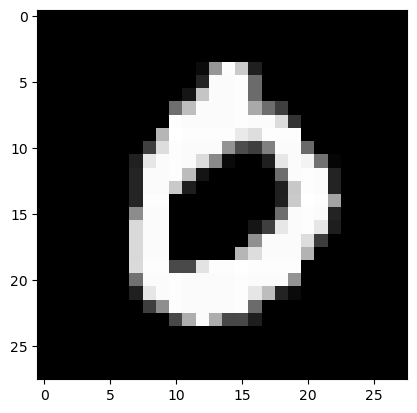

In [4]:
#Creating the sequential model
cnn_model = keras.models.Sequential([
    #Convolution front end.
    keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same", input_shape = [28, 28, 1], name="conv1"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool1"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv2"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv3"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool2"),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv4"), 
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv5"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool3"),
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", name="conv6"), 
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", name="conv7"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool4"),

	#Deep learning layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu", name="deep1"), #Dense layers can be atributed to a 'regular' hidden layer of neurons
    keras.layers.Dense(10, activation="softmax", name="deep2") 
])

#Shows the whole network topology for the compiled CNN
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Compiling the model with a loss, optimizer, and other metrics
cnn_model.summary()

#Training the network.
history = cnn_model.fit(x_train, y_train, epochs=25, validation_data=(x_valid,y_valid))
loss1 = history.loss

#Extracting the weights and biases from the neural network by layer name.
# hidden1_weights = cnn_model.get_layer("deep1").weights
# hidden1_bias = cnn_model.get_layer("deep1").bias.numpy()

#Using the trained model to make predictions based on the input
# probability_model = tf.keras.Sequential([cnn_model, 
#                                          tf.keras.layers.Softmax()])

#Predicts what the image represents. 
# x_test = x_test / 255.0 #Normalizes the input images
# predictions = probability_model.predict(x_test)

# # #Returns the most probable output layer based on the input image at index 3
# print('Predicted value: ' + str(np.argmax(predictions[3])) + ', actual digit: ' + str(y_test[3]))

# array = x_test[3]
x = np.linspace(1, 25)

# #Show the current image
plt.figure()
plt.title("Architectural CNN Performance Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(x, loss1, 'or', label="Regular CNN")
plt.show()

## Problem 2

The following code demonstrates the LaNet7 architecture in tensorflow using the MNIST dataset. 

In [ ]:
# Loading the MNIST dataset 
mnist = keras.datasets.mnist
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data() 

#Splits the dataset for validation and training datasets. 
x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

model = keras.models.Sequential([
    keras.layers.Conv2D(6, (5, 5), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    keras.layers.Conv2D(16, (5, 5), strides=(1, 1), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    keras.layers.Conv2D(120, (5, 5), padding='same', activation='relu'),

    keras.layers.Flatten(),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

#Compiling the model with a loss, optimizer, and other metrics
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#Shows the whole network topology for the compiled CNN
model.summary()

#Training the network.
model.fit(x_train, y_train, epochs=10, validation_data=(x_valid,y_valid))

#Extracting the weights and biases from the neural network by layer name.
hidden1_weights = model.get_layer("deep1").weights
hidden1_bias = model.get_layer("deep1").bias.numpy()

#Using the trained model to make predictions based on the input
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

#Predicts what the image represents. 
x_test = x_test / 255.0 #Normalizes the input images
predictions = probability_model.predict(x_test)

# #Returns the most probable output layer based on the input image at index 3
print('Predicted value: ' + str(np.argmax(predictions[3])) + ', actual digit: ' + str(y_test[3]))

array = x_test[3]

#Show the current image
plt.figure()
plt.imshow(x_test[3], cmap="gray")
plt.show()

***

# Problem 3

***

In [3]:
X = np.array([[7, 5, 0, 0, 3, 2], [6, 4, 5, 1, 4, 8], [9, 0, 2, 2, 5, 4],  [6, 3, 4, 7, 9, 8], [5, 7, 5, 6, 9, 0], [7, 9, 0, 8, 2, 3]])
f = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])